In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

In [3]:
img

array([[[200, 179, 157],
        [200, 179, 157],
        [200, 179, 157],
        ...,
        [195, 181, 158],
        [194, 180, 157],
        [193, 179, 156]],

       [[200, 179, 157],
        [200, 179, 157],
        [200, 179, 157],
        ...,
        [196, 182, 159],
        [194, 180, 157],
        [193, 179, 156]],

       [[200, 179, 157],
        [200, 179, 157],
        [200, 179, 157],
        ...,
        [196, 182, 159],
        [195, 181, 158],
        [193, 179, 156]],

       ...,

       [[ 26,  58, 158],
        [ 30,  59, 163],
        [ 33,  59, 165],
        ...,
        [154, 120,  84],
        [154, 120,  84],
        [154, 120,  84]],

       [[ 30,  62, 162],
        [ 32,  61, 165],
        [ 35,  61, 167],
        ...,
        [154, 120,  84],
        [154, 120,  84],
        [154, 120,  84]],

       [[ 35,  67, 167],
        [ 34,  63, 167],
        [ 36,  62, 168],
        ...,
        [153, 119,  83],
        [153, 119,  83],
        [153, 119,  83]]

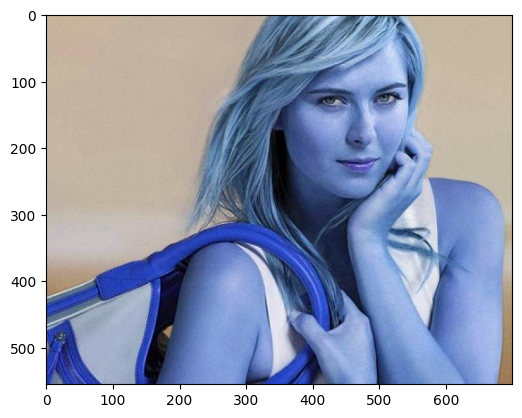

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Remove 3rd Dimension i.e rgb channel  by #  # Convert BGR to Grayscale
gray.shape

(555, 700)

In [6]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

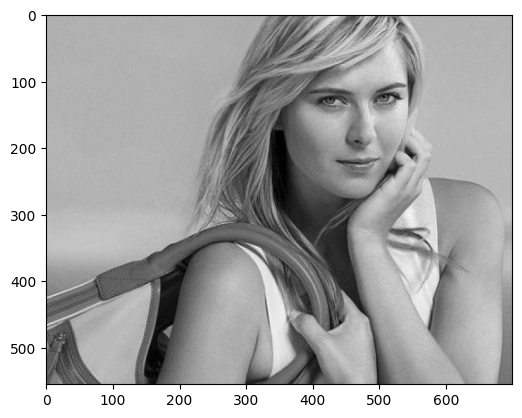

In [7]:
plt.imshow(gray, cmap = 'gray')

In [8]:
face_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_frontalface_default.xml')
face = face_cascade.detectMultiScale(gray,1.3,5)
face # return the aray of face which is X & Y & width & height

array([[352,  38, 233, 233]])

In [9]:
# store that first face in X,Y,W,H values
(x,y,w,h) = face[0]
x,y,w,h

(352, 38, 233, 233)

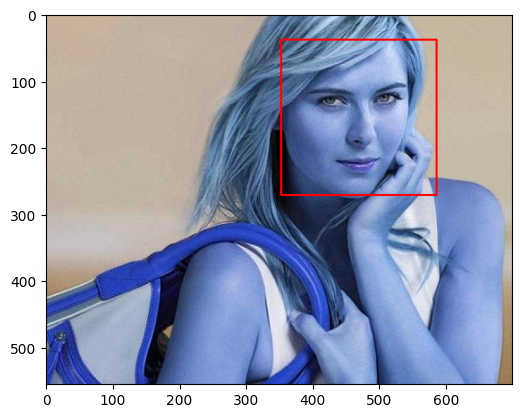

In [10]:
# draw rectangle with rgb(red((255,0,0)) color around that face using OpenCV(cv2)
face_img = cv2.rectangle(img,(x,y),(x+w, y+h), (255,0,0),2)
plt.imshow(face_img)

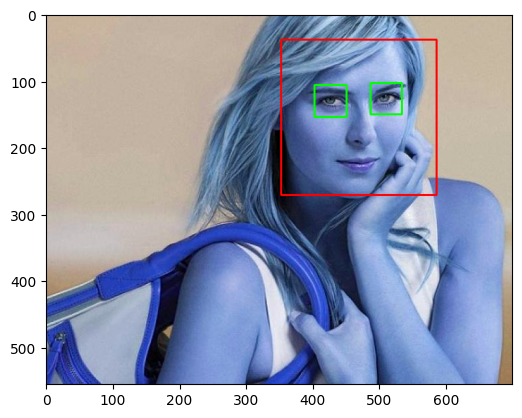

In [11]:
# Draw two eyes
eye_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_eye.xml')

cv2.destroyAllWindows()
for (x, y, w, h) in face:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2) # red
    roi_gray = gray[y:y+h, x:x+w]  
    roi_color = face_img[y:y+h, x:x+w]
    
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2) # green

plt.figure()
plt.imshow(face_img, cmap = 'gray')  
plt.show()

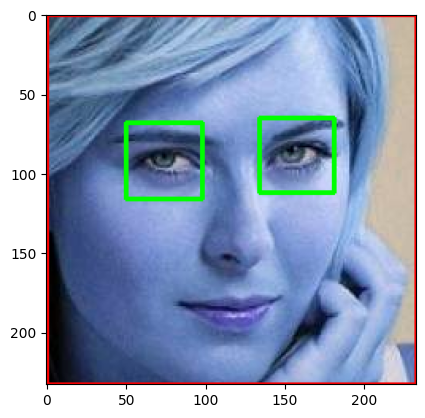

In [12]:
%matplotlib inline
plt.imshow(roi_color, cmap = 'gray')

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)

        if len(eyes) >= 2:
            return roi_color

    return None  # Return None if no suitable face with two eyes is found

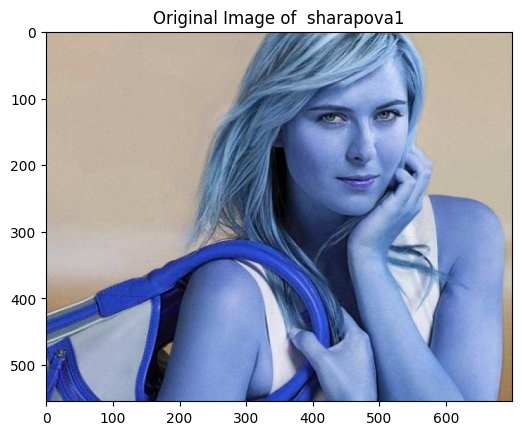

In [14]:
original_image = cv2.imread('test_images/sharapova1.jpg')
plt.imshow(original_image)
plt.title('Original Image of  sharapova1')
plt.show()

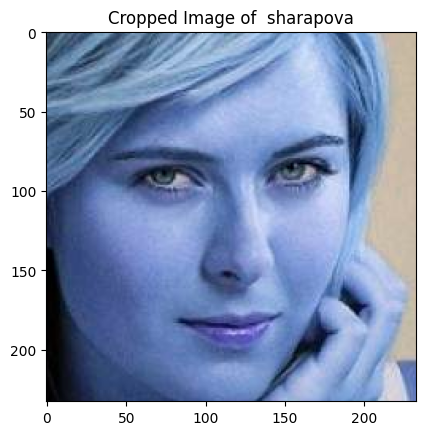

In [15]:
cropped_image = get_cropped_image_if_2_eyes('test_images/sharapova1.jpg') # function calling
if cropped_image is not None:
    plt.imshow(cropped_image)
    plt.title('Cropped Image of  sharapova')
    plt.show()
else:
    print("No suitable face with two eyes found in the image.")

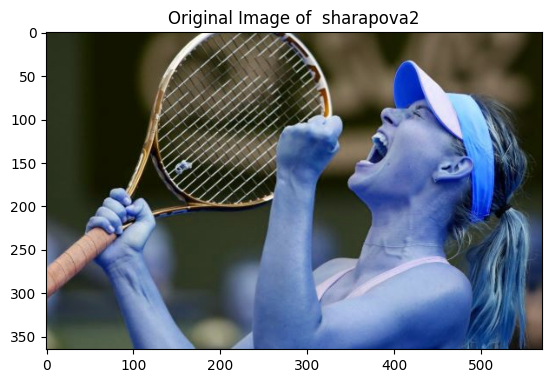

In [16]:
original_image_obstructed = cv2.imread('test_images/sharapova2.jpg')
plt.imshow(original_image_obstructed)
plt.title('Original Image of  sharapova2')
plt.show()

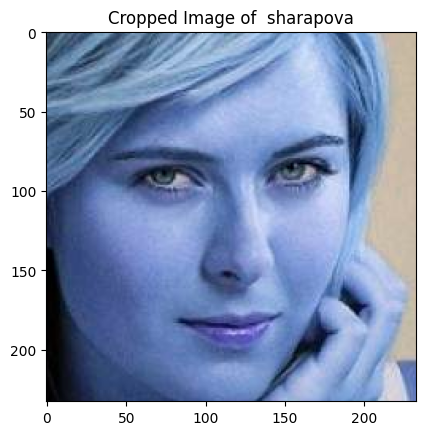

In [17]:
# Call the function with the image path
cropped_image = get_cropped_image_if_2_eyes('test_images/sharapova1.jpg')

# cropped_image = get_cropped_image_if_2_eyes('test_images/sharapova2.jpg')

if cropped_image is not None:
    plt.imshow(cropped_image)
    plt.title('Cropped Image of  sharapova')
    plt.show()
else:
    print("No suitable face with two eyes found in the image.")

In [18]:
path_to_data = "./dataset/"
path_to_creat_data = "./dataset/cropped/"

In [19]:
import os
img_dirs = []

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [21]:
# This code will create folder if there doesn't exist and also if exist by removing
import shutil

if os.path.exists(path_to_creat_data): # if folder exist
    shutil.rmtree(path_to_creat_data) # remove it 

os.mkdir(path_to_creat_data) # create new that folder


In [22]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

# Iterate over the directories containing images of celebrities
for img_dir in img_dirs:
    count = 1
    # Extract the celebrity name from the directory path
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name] = []


    # Create a list for storing file names of cropped images for the current celebrity
    celebrity_file_names_dict[celebrity_name] = []

    # Iterate over the images in the current celebrity directory
    for entry in os.scandir(img_dir):
        # Get the cropped image with two eyes
        roi_color = get_cropped_image_if_2_eyes(entry.path)

        # If a suitable face with two eyes is found
        if roi_color is not None:
            # Create a subfolder (celebrity_name) inside cropped (path_to_cr_data) folder
            cropped_folder = path_to_creat_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)  # Create if cropped_folder is not inside that folder
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder:", cropped_folder)

            cropped_file_name = celebrity_name +""+ str(count) + ".png"
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
            cv2.imwrite(cropped_file_path, roi_color) # save the image(roi_color) in folder(cropped_file_path)
                
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

# The code generates cropped images for celebrities, creating folders if needed.

cropped
lionel_messi
Generating cropped images in folder: ./dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder: ./dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder: ./dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder: ./dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder: ./dataset/cropped/virat_kohli


### Wavelet Transformation
it allows us to extract the important feature from the images.

In [23]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    # Datatype conversions
    # Convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    # Convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    # Process Coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;

    # Reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

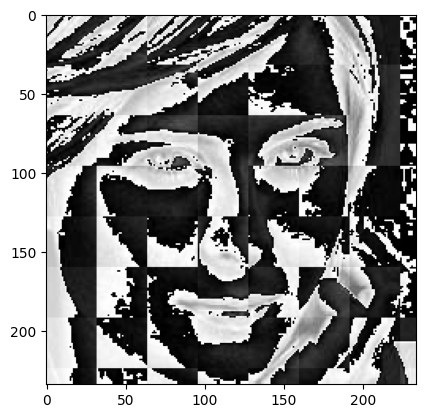

In [24]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')

In [25]:
# celebrity_file_names_dict

In [26]:
class_dict = {}
count = 0

for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1

class_dict

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

In [27]:
# # Ensure that both arrays have the correct size before reshaping
# print("Before stacking:", scaled_raw_img.shape, scaled_img_har.shape)
# combined_img = np.vstack((scaled_raw_img.reshape(32*32*3, 1), scaled_img_har.reshape(32*32, 1)))
# print("After stacking:", combined_img.shape)

In [28]:
# print("Before resizing:", scaled_raw_img.shape, scaled_img_har.shape)

# scaled_raw_img = cv2.resize(img, (32, 32))
# img_har = w2d(img, 'db1', 5)
# scaled_img_har = cv2.resize(img_har, (32, 32))

# print("After resizing:", scaled_raw_img.shape, scaled_img_har.shape)
# print(scaled_raw_img.size, scaled_img_har.size)

In [30]:
x, y = [], []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    # Iterate through individual training images
    for training_image in training_files:
        # Read and resize the raw image
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        
        # Apply wavelet transformation and resize the transformed image
        img_har = w2d(img, 'db1', 5)  # function calling
        scalled_img_har = cv2.resize(img_har, (32, 32))
        
#         print(scaled_raw_img.size, scaled_img_har.size) 
        # Combine the raw and transformed images into a single feature vector
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        
        # Append the feature vector to the x list and the corresponding label to the y list
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [31]:
len(x)

185

In [32]:
len(x[1])

4096

In [33]:
32*32*3 + 32*32

4096

In [34]:
x[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [35]:
X = np.array(x).reshape(len(x), 4096).astype(float)
X.shape

(185, 4096)

In [36]:
X[0]

array([100., 129., 140., ..., 237., 234., 232.])

## use SVM with rbf kernel tuned with heuristic finetuning

In [37]:
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8085106382978723

In [39]:
len(X_test)

47

In [40]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      0.70      0.82        10
           2       0.75      0.90      0.82        10
           3       0.50      0.33      0.40         3
           4       0.73      0.80      0.76        10
           5       0.87      0.93      0.90        14

    accuracy                           0.81        47
   macro avg       0.77      0.73      0.74        47
weighted avg       0.82      0.81      0.80        47



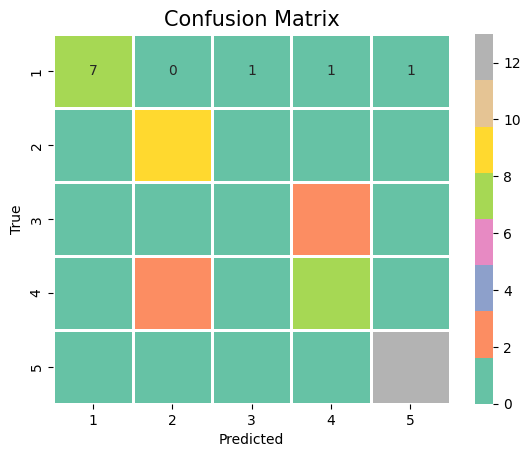

In [41]:
cm = confusion_matrix(y_test, pipe.predict(X_test))
class_labels = np.unique(y_test)

df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Plot the confusion matrix using seaborn
sns.heatmap(df_cm, annot=True, cmap='Set2', linewidths=2, fmt='d')
plt.title("Confusion Matrix", fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## use K-Nearest Neighbors(knn)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('neigh', KNeighborsClassifier(n_neighbors=3))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6808510638297872

In [43]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       0.58      0.70      0.64        10
           2       0.69      0.90      0.78        10
           3       0.00      0.00      0.00         3
           4       0.60      0.60      0.60        10
           5       0.91      0.71      0.80        14

    accuracy                           0.68        47
   macro avg       0.56      0.58      0.56        47
weighted avg       0.67      0.68      0.67        47



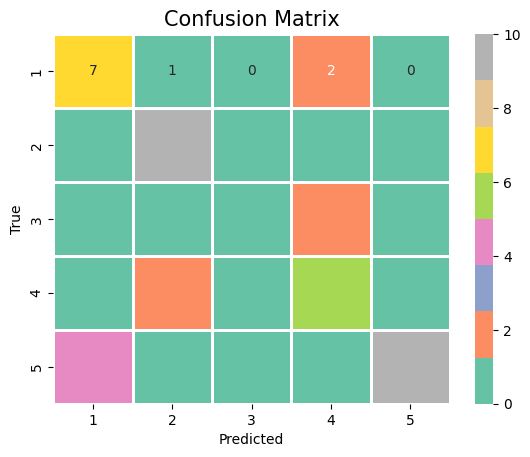

In [44]:
cm = confusion_matrix(y_test, pipe.predict(X_test))
class_labels = np.unique(y_test)

df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Plot the confusion matrix using seaborn
sns.heatmap(df_cm, annot=True, cmap='Set2', linewidths=2, fmt='d')
plt.title("Confusion Matrix", fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## use GridSearch to try out different models with different paramets. Goal is to ome up with best modle with best fine tuned parameters
### checking which model is performing best

In [45]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [46]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']  
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1, 5, 10]  
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1, 5, 10]  
        }
    }
}


In [47]:
scores = []
best_estimators = {}

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.732275,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.543122,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.753704,{'logisticregression__C': 1}


In [48]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [49]:
best_estimators['svm']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [50]:
best_estimators['svm'].score(X_test, y_test)

0.7872340425531915

In [51]:
best_estimators['random_forest'].score(X_test, y_test)

0.7021276595744681

In [52]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.8297872340425532

In [55]:
best_clf = best_estimators['logistic_regression']
best_clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, solver='liblinear'))])

In [56]:
con_matr = confusion_matrix(y_test, best_clf.predict(X_test))
con_matr

array([[ 7,  1,  0,  1,  1],
       [ 0,  9,  0,  1,  0],
       [ 0,  0,  1,  2,  0],
       [ 0,  0,  0,  9,  1],
       [ 0,  0,  1,  0, 13]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

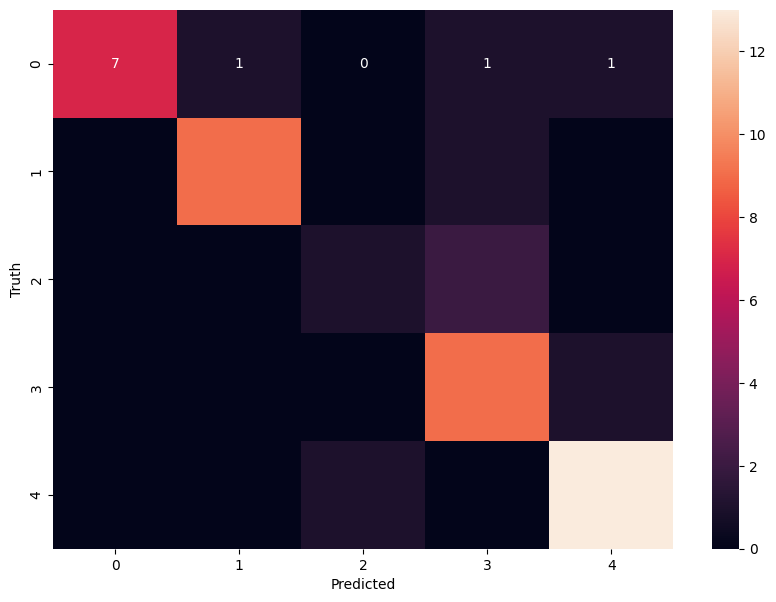

In [57]:
plt.figure(figsize = (10, 7))
sns.heatmap(con_matr, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
class_dict

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

## save the trained model

In [60]:
# import joblib
# # Save the model as a pickle in a file
# joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

## save class directory 

In [62]:
# import json
# with open("class_dictionary.json", "w") as f:
#     f.write(json.dumps(class_dict))